In [1]:
import platform
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import time
from scipy.stats import randint as sp_randint
import seaborn as sns

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib
from operator import itemgetter


from tabulate import tabulate

In [2]:
print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)


Operating system version.... Windows-10-10.0.16299-SP0
Python version is........... 3.6.3
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.13.3
matplotlib version is....... 2.1.2


In [3]:
#Définir une classe TIme au temps d'exécution total de l'ordinateur
class Timer:
  def __init__(self):
    self.start = time.time()

  def restart(self):
    self.start = time.time()

  def get_time(self):
    end = time.time()
    m, s = divmod(end - self.start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str

#Définir une méthode de tracé de corrélation
def Correlation_plot(df):
    plt.ioff()
    red_green = ["#ff0000", "#00ff00"]
    sns.set_palette(red_green)
    np.seterr(divide='ignore', invalid='ignore')
    g = sns.pairplot(df,
                     diag_kind = 'kde',
                     hue = 'SELECTION',
                     markers = ["0", "1"],
                     size = 1.5,
                     aspect = 1,
                     plot_kws = {"s": 6})
    g.fig.subplots_adjust(right = 0.9)
    plt.show()

In [4]:
# Creating bins for the win column
def assign_selection(W):
    
    if W >=1 and W <=2:
        return 1
    if W >2:
        return 0
    

In [5]:
# CHARGEMENT DES DONNES

In [6]:
def LoadData():
    global X_train, y_train, X_test, y_test, train, test 
    global feature_columns, response_column, n_features
    
     
     
    feature_columns = ['ALLURE'
                    ,'CO_DISTANCE',
                    'CO_PRIX',
                    'IDCOURSE',
                    'IDPARTCIPANT',
                    'PAR_ARRIVE',
                    'PAR_CARRIERE',
                    'PAR_CARRIERE_Q' ,
                    'PAR_CLASSE_AGE',
                    'PAR_COTEDER',
                    'PAR_ENT_ECART_GAGNANT',
                    'PAR_ENT_RAPPORT_GAGNANT_M',
                    'PAR_ENT_REU_PLACE',
                    'PAR_ENT_REUSSITE_GAGNE',
                    'PAR_ENT_VICTOIRE',
                    'PAR_GAIN',
                    'pAR_JOC_ECART_GAGNANT',
                    'PAR_JOC_ECART_PLACE',
                    'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                    'pAR_JOC_RAPPORT_GAGNANT_M',
                    'PAR_JOC_REU_PLACE',
                    'pAR_JOC_REUSSITE_GAGNE',
                    'pAR_JOC_VICTOIRE',
                    'PAR_NP',
                    'PAR_NUM',
                    'PAR_PLACE',
                    'PAR_PLACE_Q',
                    'PAR_REUSSITE_3P',
                    'PAR_REUSSITE_GAGNE',
                    'PAR_REUSSITE_QUINTE',
                    'PAR_RUESSITE_PLACE',
                    'autostart',
                    'cendre',
                    'grande_piste',
                    'Point',
                    'Nb_partant','musique','FIN_ligne']
    
    model_full=pd.read_csv ('d:\diabollo_al_1.csv',
                                       index_col=['IDPARTCIPANT','IDCOURSE','PAR_NUM'], 
                                       sep=';',
                                       names=feature_columns,skipinitialspace=True,
                                       encoding='Latin-1' )
    model_full.drop(["FIN_ligne"], axis=1, inplace=True)
      #Suppression de la collone TROT
    model_full.drop(["PAR_NP"], axis=1, inplace=True)
          #Suppression de la collone TROT
        #   df.drop(["PAR_COTEDER"], axis=1, inplace=True)
         #Suppression de la collone TROT
    model_full.drop(["cendre"], axis=1, inplace=True)
        #Suppression de la collone TROT
        ##df.drop(["autostart"], axis=1, inplace=True)
        #Suppression de la collone TROT
    model_full.drop(["grande_piste"], axis=1, inplace=True)
    model_full.drop(["CO_DISTANCE"], axis=1, inplace=True)
    model_full.drop(["musique"], axis=1, inplace=True)
        
    model_full=model_full.groupby("ALLURE")     
    model_full=model_full.get_group(1) 
        #Suppression de la collone TROT
    model_full.drop(["ALLURE"], axis=1, inplace=True)

        
        # les lignes sans GAIN sont éliminées
    model_full=model_full[model_full.PAR_GAIN >0] # On garde les lignes avec GAIN
    model_full=model_full[model_full.PAR_GAIN <1000000] # On garde les lignes avec GAIN
    model_full=model_full[model_full.PAR_ARRIVE>0] 

        
        #df_gagnant['SELECTION'] = (df_gagnant.PAR_ARRIVE<=3).astype(int)
    model_full['SELECTION'] = model_full['PAR_ARRIVE'].apply(assign_selection)
        #Suppression de la colonne PAR_ARRIVE
        #longueur
    nb=len(model_full)

        # pour chaque ligne du df_gagnant
        #for i in xrange(df_gagnant):




        #Suppression de la PAR_ARRIVE
        # Elle ne sert plus
        #df_gagnant.drop(["IDPARTCIPANT"], axis=1, inplace=True)
        #df_gagnant.drop(["IDCOURSE"], axis=1, inplace=True)
    model_full.drop(["PAR_ARRIVE"], axis=1, inplace=True)
    model_full.drop(["Nb_partant"], axis=1, inplace=True)
    model_full.drop(["autostart"], axis=1, inplace=True)

        
    feature_columns =  list(model_full.columns[:26]) # Liebllé des variable DATA
    
    response_column = ['SELECTION']
    
    
    
    n_features = len(feature_columns)
    mask = feature_columns + response_column
    
    model = model_full[mask]
    print('Model dataset:\n', model.head(5))
    print('\nDescription of model dataset:\n', model[feature_columns].describe(include='all'))
     
    #Correlation_plot(model)

    # Split the data into Train and Test with Train having 80% and test 20% each
    train_full, test_full = np.split(model_full.sample(frac=1), [int(.8*len(model))])

    X_train  = train_full[feature_columns].as_matrix()
    y_train_ = train_full[response_column].as_matrix()
    X_test   = test_full[feature_columns].as_matrix()
    y_test_  = test_full[response_column].as_matrix()
    
    y_train = np.reshape(y_train_, len(y_train_))
    y_test  = np.reshape(y_test_,  len(y_test_))
    
    train = train_full[mask]
    test  = test_full[mask]
    print('Shape of train: ', train.shape)
    print('Shape of test:  ', test.shape)
    return

In [7]:
#Définir une méthode pour tracer une courbe ROC
def ROC_Curve(rf, auc):
    one_hot_encoder = OneHotEncoder()
    rf_fit = rf.fit(X_train, y_train)
    fit = one_hot_encoder.fit(rf.apply(X_train))
    y_predicted = rf.predict_proba(X_test)[:, 1]
    false_positive, true_positive, _ = roc_curve(y_test, y_predicted)

    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % auc)
    plt.legend(loc='best')
    plt.show()
    
    
#    Définir une méthode pour imprimer les performances du modèle
def Print_Metrics(saved_rf):
    print('\nModel performance on the test data set:')

    # print('Train Accuracy.......', accuracy_score(y_train, best_model.predict(X_train)))
    # print('Validate Accuracy....', accuracy_score(y_valid, best_model.predict(X_valid)))

    y_predict_test  = best_model.predict(X_test)
    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    logloss_test    = metrics.log_loss(y_test, y_predict_test)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    accuracy_test2  = best_model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    precision_test2 = metrics.precision_score(y_test, y_predict_test)
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)
   
    #test_auc       = h2o.get_model("best_rf").model_performance(test_data=test).auc()
    #print('Best model performance based on auc: ', test_auc)
    
    header = ["Metric", "Test"]
    table  = [
               ["logloss",   logloss_test],
               ["accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]

    print(tabulate(table, header, tablefmt="fancy_grid"))

In [8]:
#Définir une méthode pour tracer l'importance du prédicteur
def Plot_predictor_importance(best_model, feature_columns):
    feature_importance = best_model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    y_pos  = np.arange(sorted_idx.shape[0]) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            feature_importance[sorted_idx], 
            align='center', 
            color='green', 
            ecolor='black', 
            height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_columns)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Predictor Importance')
    plt.show()

In [9]:
#Définir une fonction d'utilité pour signaler les meilleurs scores
def Report_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [10]:
#Définir une méthode pour imprimer la matrice de confusion et les indicateurs de performance
def Print_confusion_matrix(cm, auc, heading):
    print('\n', heading)
    print(cm)
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)
    print('auc......................%7.4f' % auc)

In [11]:
#Tracer les courbes d'apprentissage
def Plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,
                                                            cv = cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

In [12]:
#Définir les hyperparamètres pour une recherche aléatoire
def Random_Search():
    global best_model, saved_moldel
    
    param_grid = {"n_estimators": range(20, 100, 2),
                  "max_depth": range(4, 50, 2),
                  "min_samples_leaf": range(2, 100, 2),
                  "max_features": sp_randint(1, n_features),
                  "min_samples_split": sp_randint(2, 10),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

    clf = RandomForestClassifier(class_weight = 'balanced')
    n_iter_search = 2
    estimator = RandomizedSearchCV(clf,
                                   param_distributions = param_grid,
                                   n_iter = n_iter_search,
                                   scoring = 'roc_auc',
                                   verbose = 0,
                                   n_jobs = 1)
        
    fit = estimator.fit(X_train, y_train)

    # Cross validation with 20 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv_ = ShuffleSplit(n_splits = 20, test_size = 0.20, random_state = 0)
    Plot_learning_curve(estimator, 
                        'Learning Curves',
                        X_train, y_train, 
                        cv = cv_,
                        n_jobs = 1)
     
    Report_scores(estimator.cv_results_, n_top = 3)
    
    best_model = estimator.best_estimator_
    print('\nbest_model:\n', best_model)

    print('\nFeature Importances:', best_model.feature_importances_)
    Plot_predictor_importance(best_model, feature_columns)

    y_predicted = best_model.predict(X_train)
    probabilities = best_model.predict_proba(X_train)

    c_report = classification_report(y_train, y_predicted)
    print('\nClassification report:\n', c_report)

    y_predicted_train = best_model.predict(X_train)
    cm = confusion_matrix(y_train, y_predicted_train)
    auc = roc_auc_score(y_train, y_predicted_train)
    Print_confusion_matrix(cm, auc, 'Confusion matrics of the training dataset')

    y_predicted = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    auc = roc_auc_score(y_test, y_predicted)

    ntotal = len(y_test)
    correct = y_test == y_predicted
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect, ntotal, percent))
    prediction_score = 100.0*best_model.score(X_test, y_test)
    print('Random Forest Prediction Score on test data: %8.3f' % prediction_score)

    #model_path = 'C:/sm/BottleRockets/trained_models/sklearn_rf_classify.pkl'
    #joblib.dump(best_model, model_path)

    #saved_model = joblib.load(model_path)
    #y_predicted_test = best_model.predict(X_test)
    #cm = confusion_matrix(y_test, y_predicted_test)
    #auc = roc_auc_score(y_test, y_predicted_test)
    #Print_confusion_matrix(cm, auc, 'Confusion matrics of the test dataset')
    #ROC_Curve(best_model, auc)
    #Print_Metrics(saved_model)
    return

# Exécuter la recherche aléatoire

In [13]:

my_timer = Timer()
LoadData()

elapsed = my_timer.get_time()

print("\nTotal compute time was: %s" % elapsed)


Model dataset:
                                CO_PRIX  PAR_CARRIERE  PAR_CARRIERE_Q  \
IDPARTCIPANT IDCOURSE PAR_NUM                                          
563653.0     45585.0  3.0      95000.0          73.0            11.0   
563909.0     45607.0  8.0       5000.0          35.0             0.0   
563654.0     45585.0  4.0      95000.0          57.0            14.0   
563910.0     45607.0  9.0       5000.0          30.0             0.0   
563655.0     45585.0  5.0      95000.0          66.0            15.0   

                               PAR_CLASSE_AGE  PAR_COTEDER  \
IDPARTCIPANT IDCOURSE PAR_NUM                                
563653.0     45585.0  3.0             37764.0         14.0   
563909.0     45607.0  8.0               933.0         61.0   
563654.0     45585.0  4.0             36756.0          5.0   
563910.0     45607.0  9.0               975.0         87.0   
563655.0     45585.0  5.0             34724.0          9.0   

                               PAR_ENT_ECART

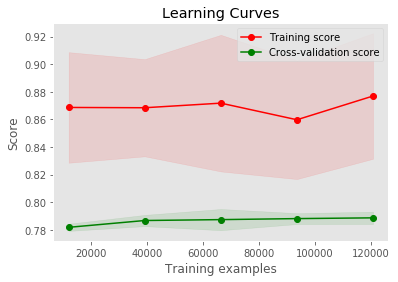

Model with rank: 1
Mean validation score: 0.790 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 36, 'max_features': 5, 'min_samples_leaf': 52, 'min_samples_split': 3, 'n_estimators': 54}

Model with rank: 2
Mean validation score: 0.790 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 20, 'min_samples_split': 9, 'n_estimators': 58}


best_model:
 RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=36, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=52,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=54, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Feature Importances: [ 0.02129661  0.01709984  0.00244379  0.02642657  0.34131359  0.0101687
  0.01581598  0.0285643   0.010

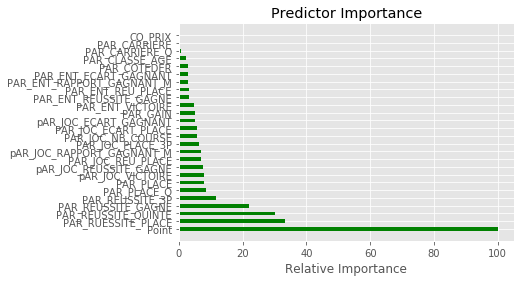


Classification report:
              precision    recall  f1-score   support

          0       0.97      0.76      0.85    129177
          1       0.38      0.84      0.52     21895

avg / total       0.88      0.78      0.80    151072


 Confusion matrics of the training dataset
[[98719 30458]
 [ 3509 18386]]
accuracy................. 0.7752
precision................ 0.3764
recall................... 0.8397
F1....................... 0.5198
auc...................... 0.8020

Correct classifications on test data: 27695/37768   73.329%
Random Forest Prediction Score on test data:   73.329


In [14]:
my_timer = Timer()
Random_Search()
elapsed = my_timer.get_time()
